# Getting ready

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize']=[16,9]
plt.rcParams['figure.dpi']= 300
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import yfinance as yf

In [31]:
df = yf.download('AMZN',
                 auto_adjust=False,
                 progress=False)

In [32]:
df['simple_return']=df['Adj Close'].pct_change()
df['log_return']=np.log(df['Adj Close']/df['Adj Close'].shift())
df = df[['Adj Close','simple_return','log_return']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)


In [33]:
df

adj_close  simple_return  log_return
Date                                              
1997-05-15     1.958333            NaN         NaN
1997-05-16     1.729167      -0.117021   -0.124454
1997-05-19     1.708333      -0.012048   -0.012121
1997-05-20     1.635417      -0.042683   -0.043621
1997-05-21     1.427083      -0.127388   -0.136265
...                 ...            ...         ...
2020-05-28  2401.100098      -0.003854   -0.003862
2020-05-29  2442.370117       0.017188    0.017042
2020-06-01  2471.040039       0.011739    0.011670
2020-06-02  2472.409912       0.000554    0.000554
2020-06-03  2478.399902       0.002423    0.002420

[5801 rows x 3 columns]

# Using plot method

In [40]:
fig, ax = plt.subplots( 3, 1,figsize=(24,20), sharex=True)

df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT time series',
         ylabel = 'Stock pice ($)')
df.simple_return.plot(ax=ax[1])
ax[1].set(ylabel='Simple returns (%)')
df.log_return.plot(ax=ax[2])
ax[2].set(xlabel='Date',
         ylabel='Log returns (%)')

[Text(0, 0.5, 'Log returns (%)'), Text(0.5, 0, 'Date')]

# Using plotly and cufflinks

In [35]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [36]:
#set up configuration (run once)
#cf.set_config_file(world_readable=True, theme='pearl', offline=True)

In [37]:
init_notebook_mode()

In [41]:
df.iplot(subplots=True,shape=(3,1),
        shared_xaxes=True,
        title='MSFT time series')

# Outliers

In [43]:
df_rolling = df[['simple_return']].rolling(window=21).agg(['mean','std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [44]:
df_outliers=df.join(df_rolling)
df_outliers

adj_close  simple_return  log_return      mean       std
Date                                                                  
1997-05-15     1.958333            NaN         NaN       NaN       NaN
1997-05-16     1.729167      -0.117021   -0.124454       NaN       NaN
1997-05-19     1.708333      -0.012048   -0.012121       NaN       NaN
1997-05-20     1.635417      -0.042683   -0.043621       NaN       NaN
1997-05-21     1.427083      -0.127388   -0.136265       NaN       NaN
...                 ...            ...         ...       ...       ...
2020-05-28  2401.100098      -0.003854   -0.003862  0.002015  0.022852
2020-05-29  2442.370117       0.017188    0.017042  0.001627  0.022503
2020-06-01  2471.040039       0.011739    0.011670  0.000153  0.020613
2020-06-02  2472.409912       0.000554    0.000554  0.003797  0.011009
2020-06-03  2478.399902       0.002423    0.002420  0.003288  0.010803

[5801 rows x 5 columns]

In [45]:
# function to detect outliers
def indentify_outliers(row, n_sigmas=3):
    x = row['simple_return']
    mu = row['mean']
    sigma= row['std']
    
    if (x> mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0


df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['simple_return']]

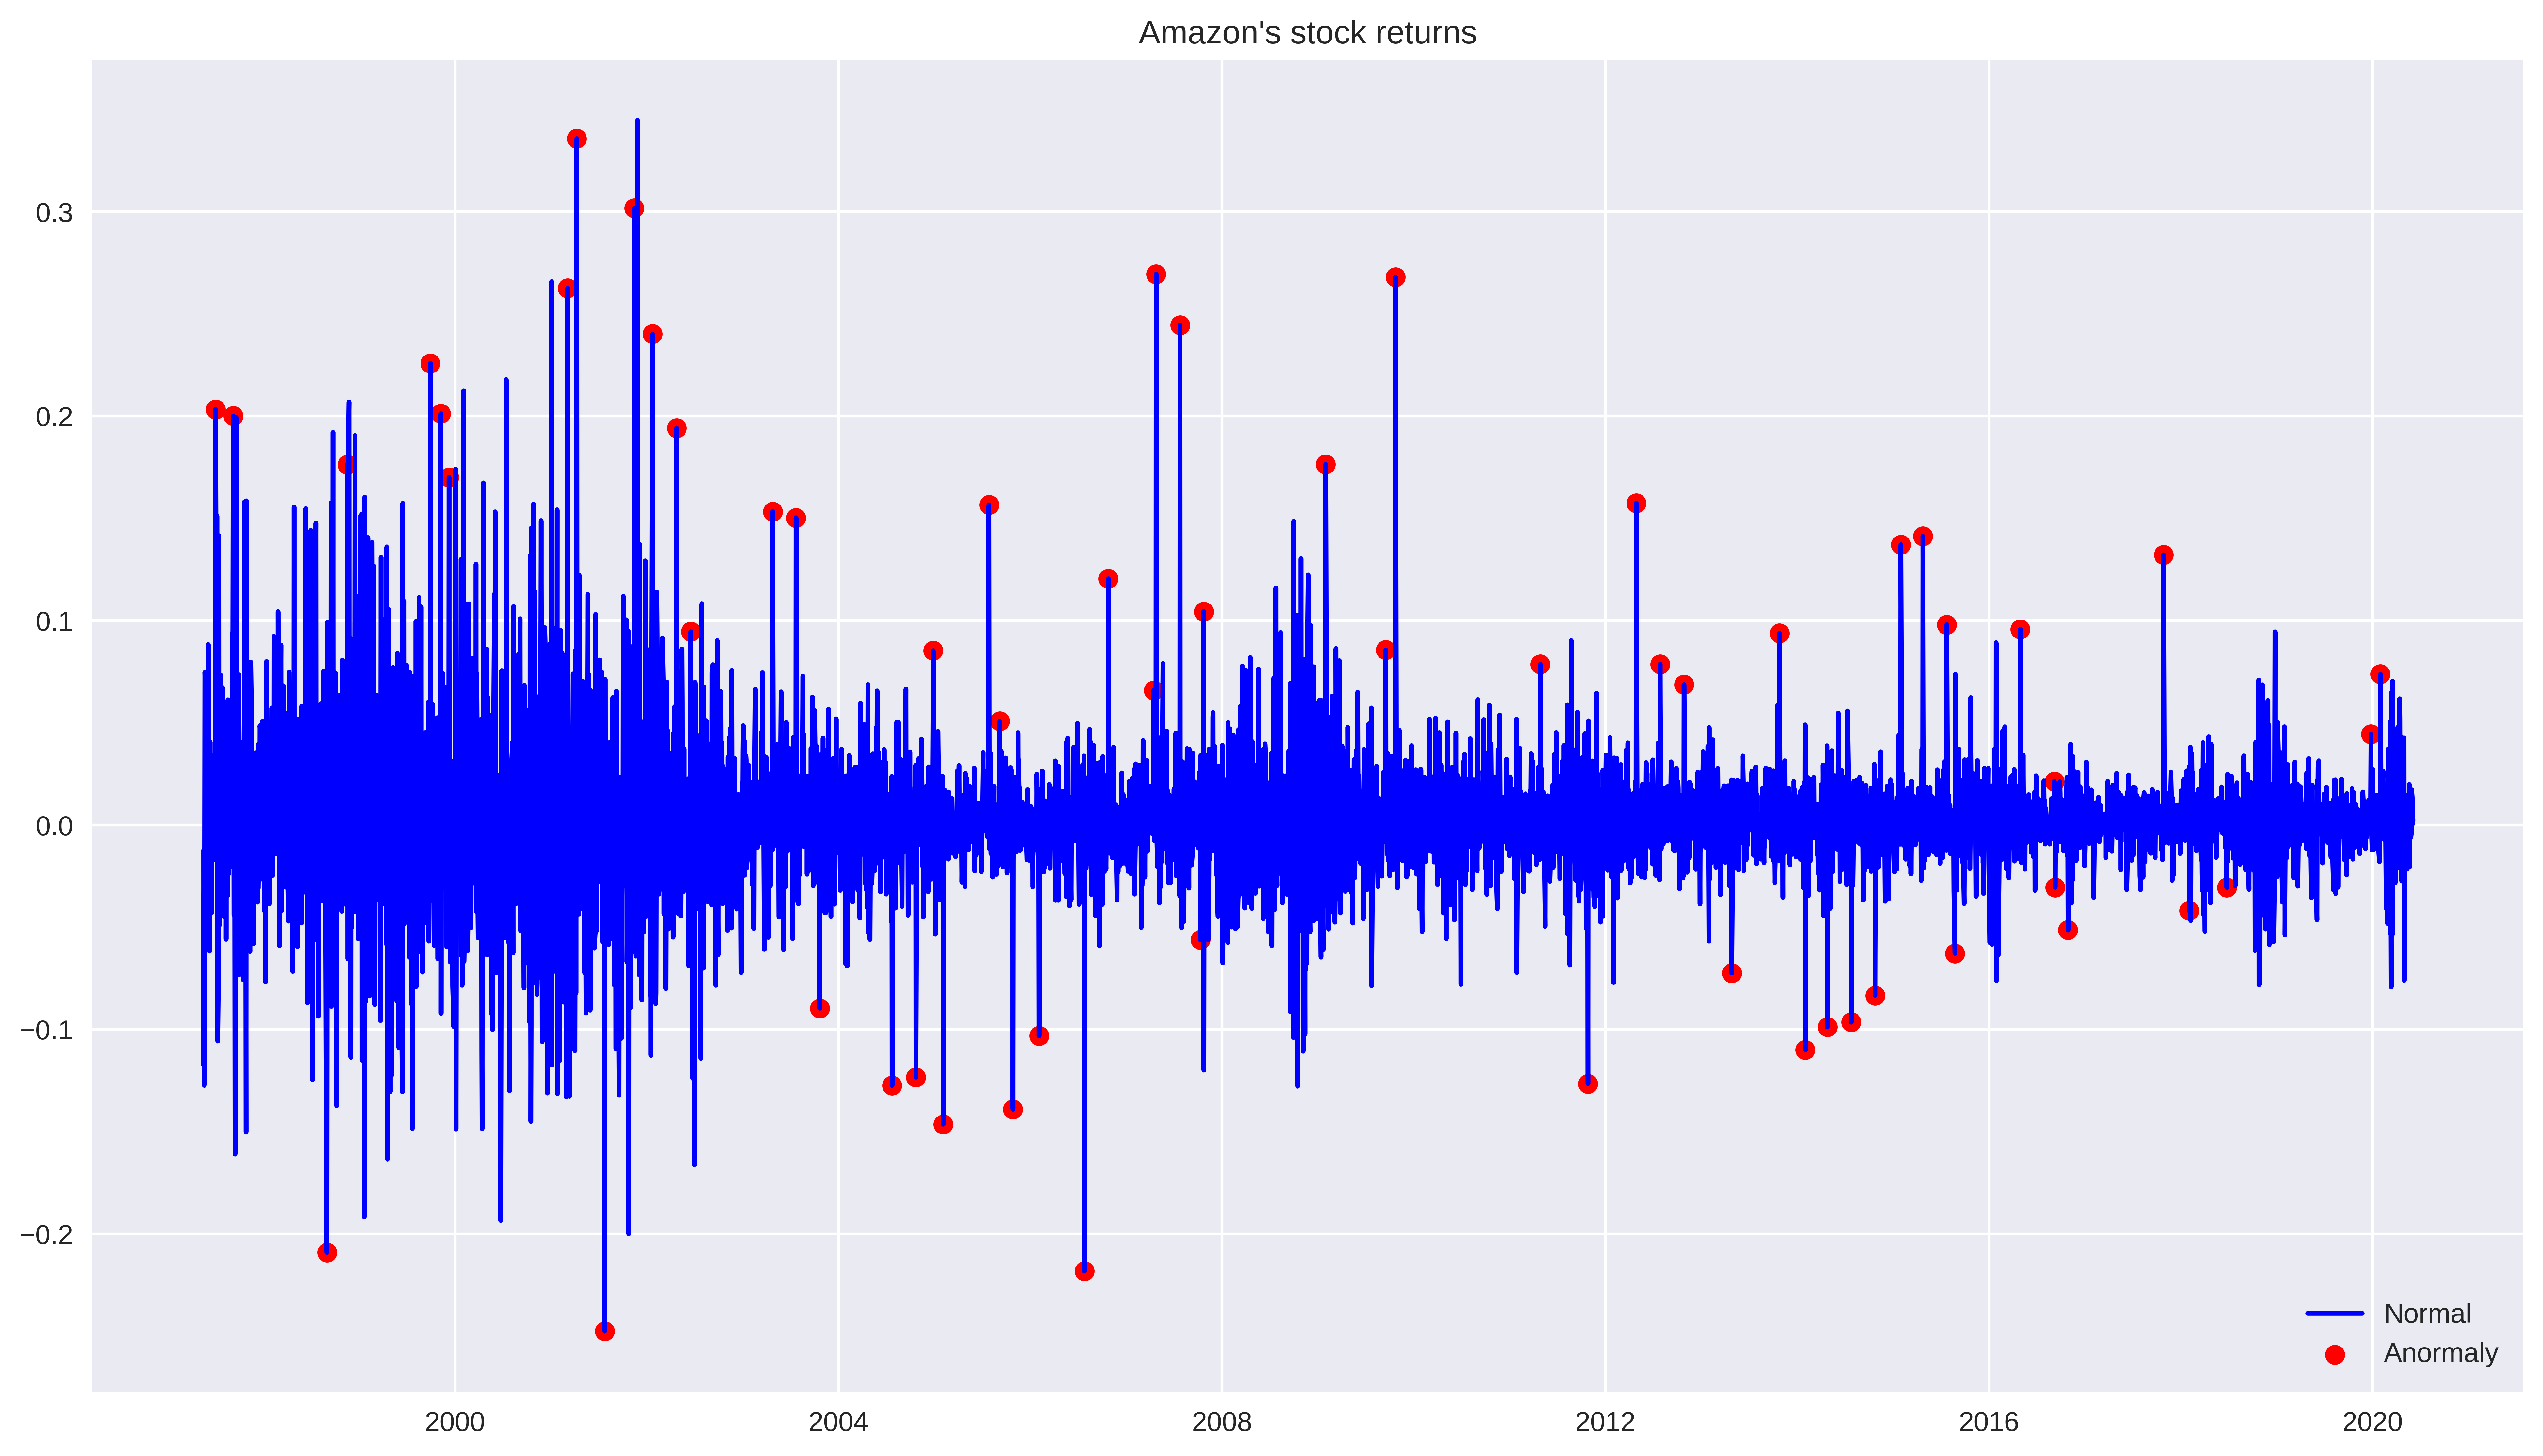

In [51]:
fig, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers.simple_return,
       color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_return,
          color='red',label='Anormaly')
ax.set_title("Amazon's stock returns")
ax.legend(loc='lower right');